## Welcome to Week 0!

Live sessions during this course will be oriented primarily around:

1.   Lecture
2.   Programming in [Jupyter notebooks](https://jupyter.org/) like the one you're in now.

We will release notebooks on Mondays. Before lecture, you should download the .ipynb file, and open it either locally on your own machine or in Google Colab. It's a good idea to skim the notebook to get a sense for what it covers, but **don't start working on it before lecture**--the idea is for you to starting working on these **in class** (with the instructors and, more importantly, with your classmates).

---

This week we have some warm-up excercises to go through so that we can all practice using notebooks and some other tools that will be used throughout the course.

*   Google Colab is a tool for editing and running Jupyter notebooks using Google's infrastructure. For most of you, using Colab to edit and run notebooks will make your life easier, especially after week 5 of the course.
*   We're asking you to do Week 0's assignment (this one) in Colab, but after today you **aren't required to use it**.


### Task 1 -- Open File in Google Colab

1. Download the .ipynb file released in Canvas.
2. Make a folder in Google Drive where you can put content for the course and upload the .ipynb file to your Google Drive folder
3. Install Google Colaboratory:
    * Right click on the .ipynb file and go to "Connect more apps" (you can skip this if you already see "Google Colaboratory"
    * Search for "Colaboratory" and click Install.
4. Now if you click on the file it should open in Google colab.

### Task 2 -- Open csv File in Google Colab

There are [several ways to do this](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP), but just follow along below.

> *Note: If you run this file locally rather than in Google Colab, you can just load in the data as follows:*
> 
> ```
> import pandas as pd
> data = pd.read_csv('time_series_covid_19_confirmed.csv')
> ```

1. Download the data file from Canvas (this week the data is `time_series_covid_19_confirmed.csv`).

2. Import pandas, which we'll be using to wrangle .csv files.

In [ ]:
import pandas as pd

3. Upload the time_series_covid_19_confirmed.csv file to Google drive.

4. We will be using the google colab package for managing the drive. Run the following line and grant the permissions requested.

In [ ]:
from google.colab import drive

5. Run the following code to mount your Google Drive at the location */content/drive* on the virtual machine running this notebook. You will have access to all the files in your Google Drive.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


6. Edit filepath to be the path to the csv file. In my case, it's located in Google Drive in a folder called fourthbrain.
7. Run the following line to load the data into a Pandas DataFrame.

In [ ]:
filepath = '/content/drive/My Drive/FourthBrain/time_series_covid_19_confirmed.csv'
data = pd.read_csv(filepath)

8. Verify that the data is loaded in correctly by running data.head() to see the first few rows of the DataFrame.

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


### Task 3 -- Get familiar with the data

1. We will be using matplotlib, so start by importing it.

In [ ]:
from matplotlib import pyplot as plt

2. Look at the first 5 rows of the DataFrame with `data.head()`

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


3. Look at the data to get an idea of what it is and then write a few sentences describing what you notice about the data.

This is a time series data, containing data about COVID-19 infections by country and provinces/states. The data have 266 rows and 225 columns. The features include Province/State, Country, Region, Lat and Long along with the Time Series of Count of cases reported. The time series seems to show the cumulative number of infections. 


4. Notice that the data includes country level data as well as province/state level data. Let's only include rows that don't have provinces or states. Use the `.isna()` method on the `Province/State` column to determine these rows and subset to only include the rows without a Province/State.

  Verify that the result of the `head()` method is what's expected.

In [ ]:
data_countries = data[data['Province/State'].isna() == True]
data_countries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


5. Use the `.set_index()` method to set the index to be the `Country/Region` column. This will make acccessing the data by country easier. Use the `inplace=True` attribute to modify the existing DataFrame rather than creating a new one.

  Verify that the result of the `head()` method is what's expected.

In [ ]:
data_countries.set_index('Country/Region', inplace=True)

data_countries.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


6. Subsample the data so that it only includes the first 100 days. Hint: Use `iloc`

  Verify that the result of the `head()` method is what's expected.

In [ ]:
data_subsampled = data_countries.iloc[:, :103]

data_subsampled.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


7. We can drop the `Province/State` column since we are no longer using it.

  Here, `axis=1` is referring to dropping a column rather than dropping a row.
  
  Look at the result of the `head()` method to verify that it's what's expected.

In [ ]:
data_subsampled.drop(["Province/State"], axis=1, inplace=True)
data_subsampled.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


8. What is the size of your subsampled dataset? (Use `shape`)

In [ ]:
data_subsampled.shape

(185, 102)

9. Choose 5 countries and plot infections vs the number of days after January 22, 2020.

  To get the row of a country by name, do `data_subsampled.loc['Angola']`.

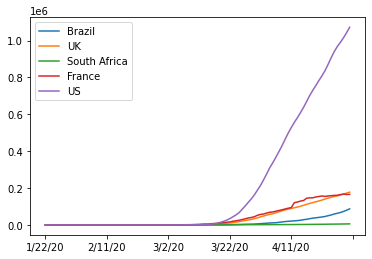

In [ ]:
#data_subsampled.loc['Brazil'][2:].plot()
#data_subsampled.loc['United Kingdom'][2:].plot()
#data_subsampled.loc['South Africa'][2:].plot()
#data_subsampled.loc['France'][2:].plot()
#data_subsampled.loc['US'][2:].plot()

data_subsampled.loc['Brazil'][2:].plot()
data_subsampled.loc['United Kingdom'][2:].plot()
data_subsampled.loc['South Africa'][2:].plot()
data_subsampled.loc['France'][2:].plot()
data_subsampled.loc['US'][2:].plot()
plt.legend(['Brazil', 'UK', 'South Africa', 'France', 'US'], loc = 'upper left')
plt.show()

### Task 4 -- Set up a regression problem based on latitude, longitude, and date

Now we're going to see if the combination of latitude, longitude, and date can be used to accurately predict the number of infections in this dataset.

1. We will be creating two matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ holds the `[lat, long, date]` data and $\mathbf{Y}$ holds the `infection` data. $\mathbf{X}$ will have shape $k \times 3$ and $\mathbf{Y}$ should have shape $k \times 1$. What is the value $k$, based on the size of the subsample from the full dataset that we've taken?


k = 100

2. It will be easier to work with the data if we do a transformation using the `.melt()` method.

In [ ]:
data_transformed = data_subsampled.melt(id_vars=["Lat", "Long"], var_name='Date', value_name="Covid Cases")
data_transformed.head()

,Lat,Long,Date,Covid Cases
0,33.93911,67.709953,1/22/20,0
1,41.15330,20.168300,1/22/20,0
2,28.03390,1.659600,1/22/20,0
3,42.50630,1.521800,1/22/20,0
4,-11.20270,17.873900,1/22/20,0


3. Looking at the result of `data_transformed.head()`, what did the `.melt()` transformation do?

It reshaped the data from wide format to long format.

4. Instead of the data, we will want to work with `Days since January 22, 2020`, so let's add that column. Pandas has some slick ways of working dates, so we're taking advantage of that to get what we want.

In [ ]:
from datetime import datetime
date_series = pd.to_datetime(data_transformed['Date'])
data_transformed['Num Days'] = (date_series - date_series[0]).dt.days
data_transformed.head()

,Lat,Long,Date,Covid Cases,Num Days
0,33.93911,67.709953,1/22/20,0,0
1,41.15330,20.168300,1/22/20,0,0
2,28.03390,1.659600,1/22/20,0,0
3,42.50630,1.521800,1/22/20,0,0
4,-11.20270,17.873900,1/22/20,0,0


5. Now we're ready to create the matrices $\mathbf{X}$ and $\mathbf{Y}$ below by selecting the appropriate data from the `data_transformed` DataFrame.

  Make sure to do `.values` to convert the data to numpy arrays rather than Pandas objects.

In [ ]:
X = data_transformed[["Lat", "Long","Num Days"]].values
Y = data_transformed['Covid Cases'].values

6. The following code will make a plot for each of the 3 independent variables (latitude, longitude, and date). Each plot shoes the variable on the x axis and the number of infections on the y axis.

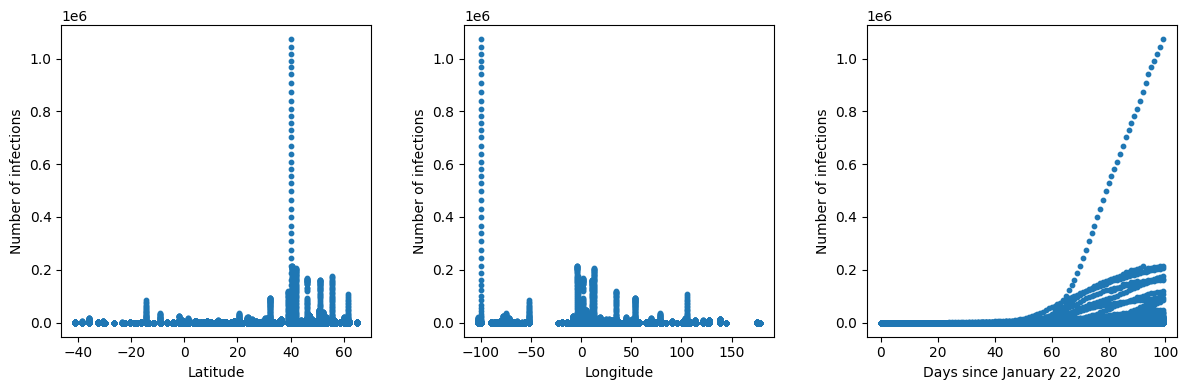

In [ ]:
plt.figure(figsize=(12, 4), dpi=100)
for i, variable in enumerate(['Latitude', 'Longitude', 'Days since January 22, 2020']):
  ax = plt.subplot(1, 3, i + 1)
  ax.scatter(X[:, i], Y, s=10)
  ax.set_xlabel(variable)
  ax.set_ylabel('Number of infections')
plt.tight_layout(w_pad=3)

7. Discuss with your classmates in your breakout room what you notice about this data. Are there other ways you might try to visualize it to uncover some structure? Does this data look like a good candidate for fitting a linear model?

The data does not seem to follow a normal distribution, and there is one clear outlier, a country with a number of infections that is much higher than the other countries in this data set. Further investigation would be necessary to understand whether this one country has high leverage and how this affects the predictions.

8. Now split the data randomly into training and test sets. Make the training set 70% of the data and the test set the remaining 30%. You could do this manually, but we'll use the `train_test_split` function from the machine learning library [scikit-learn](https://scikit-learn.org/stable/). We use a random state so that every time you run the code you'll get the same result which makes it easier to test our code.

    The line should look like:
    ```
    X_train, X_test, Y_train, Y_test = train_test_split(<FILL IN HERE>, random_state=10)
    ```
    
    Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to determine what parameters to pass `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

### Task 5 -- Apply a linear regression model to the data

We'll be using scikit-learn's `LinearRegression` module. In the week's material, you'll learn how to do a linear regression manually, but for now let's use scikit-learn's implementation.

1. Import the `LinearRegression` module.

In [ ]:
from sklearn.linear_model import LinearRegression

2. Build a `LinearRegression` model for our data. You will need run the `lin_regression.fit()` method passing it the training set (`X_train` and `Y_train`). Take a look at the scikit-learn documentation for [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more details.

In [ ]:
lin_regression = LinearRegression()

lin_regression.fit(X_train, Y_train)

print("The regression coefficients are: ", lin_regression.coef_)
print("The intercept is", lin_regression.intercept_)

The regression coefficients are:  [146.88808287 -52.03302752 161.1905594 ]
The intercept is -6271.353346688017


3. Use the `.predict()` method of the `lin_regression` object to generate predictions of the test data.

In [ ]:
Y_pred = lin_regression.predict(X_test)

4. What is the MSE? Use scikit-learn's `mean_squared_error` function to find out. You'll need to compare the `Y_pred` with `Y_test`.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

659627623.0450557

5. You can also calculate the R^2 value by using the `score()` method of `lin_regression`. Make sure to pass it the test arrays (and not the train ones!)

In [ ]:
lin_regression.score(X_test, Y_test)

0.03260569121454682

## Task 6 -- Apply a polynomial regression of degree 2 to this data

To see if we can improve on the accuracy, we're going to try adding polynomial features. We can do this with the `PolynomialFeatures` module.

1. Import the module we'll be using.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

2. We'll use `degree=2` which means we'll include new features that are our old features squared as well as the combinations of the features (e.g. $ab$). How many new features will this add?

  Note: it will also include an additional constant feature.

Seven new features.

3. We use the `PolynomialFeatures` module to add the new features. See the result of the shape of the new test set. Is it what you expected? If not, go back and see which features you missed.

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
print("New shape of test data=", X_test_poly.shape)

New shape of test data= (5550, 10)


4. Use the new `X_train_poly` and `Y_train_poly` build a linear regression model and get the MSE and R^2 values like you did above.

In [ ]:
pol_reg = LinearRegression()

pol_reg.fit(X_train_poly, Y_train)

Y_pred_poly = pol_reg.predict(X_test_poly)

print("MSE: ", mean_squared_error(Y_test, Y_pred_poly))
print("R^2: ", pol_reg.score(X_test_poly, Y_test))

MSE:  634880065.2295289
R^2:  0.06889987561598498


5. How does the score of this model that uses polynomial features compare to the linear model above?

The fit for this model using polynomial features is an overall improvement (lower MSE and higher R-Squared) compared to the previous linear model that does not use polynomial features.

### Task 7 -- Run an experiment identifying the degree of the best-fitting polynomial regression

1. Your job is now to repeat the fitting and prediction steps above, but for polyomials of all orders from 1 to 20. For each fit, compute and save the mean squared error of the predictions.

In [ ]:
#looping through polynomials
polynomial_iterator = []
for i in range(1, 21):
  polyfeat = PolynomialFeatures(degree=i)
  X_train_polyt = polyfeat.fit_transform(X_train)
  X_test_polyt = polyfeat.transform(X_test)
  lreg = LinearRegression()
  lreg.fit(X_train_polyt, Y_train)
  Y_pred_polyt = lreg.predict(X_test_polyt)

  #printing scores for each polynomial order
  print("Polynomial Order: ", i)
  print("MSE: ", mean_squared_error(Y_test, Y_pred_polyt))
  print("R^2: ", lreg.score(X_test_polyt, Y_test))

Polynomial Order:  1
MSE:  659627623.045056
R^2:  0.032605691214546484
Polynomial Order:  2
MSE:  634880065.2295289
R^2:  0.06889987561598498
Polynomial Order:  3
MSE:  596934127.3093629
R^2:  0.12455049287794173
Polynomial Order:  4
MSE:  510824595.5967189
R^2:  0.2508367004300812
Polynomial Order:  5
MSE:  367979908.92889977
R^2:  0.46032934763726274
Polynomial Order:  6
MSE:  244762949.350913
R^2:  0.6410364333886576
Polynomial Order:  7
MSE:  181260645.2247308
R^2:  0.7341674143546193
Polynomial Order:  8
MSE:  155470221.9950875
R^2:  0.7719910405671633
Polynomial Order:  9
MSE:  145047096.65812013
R^2:  0.7872773502644316
Polynomial Order:  10
MSE:  137415949.23054627
R^2:  0.7984690110333643
Polynomial Order:  11
MSE:  131519246.76559548
R^2:  0.8071169757423937
Polynomial Order:  12
MSE:  137060680.19263646
R^2:  0.7989900402221892
Polynomial Order:  13
MSE:  119695452.30161704
R^2:  0.8244574737341226
Polynomial Order:  14
MSE:  117805862.17603476
R^2:  0.8272287020295461
Polyn

2. Report the polynomial order that resulted in the best fit. Does this number make sense? Do you think the regression has produced a good model for the data? Discuss with your classmates.

The polynomial order 18 resulted in the best fit (highest R-Squared and lowest MSE). It is important to note that a high polynomial degrees such as this tend to overfit the data, affecting the predictions on the test data. Important steps to evaluate this model would include plotting the residuals to understand whether the model meets the assumptions of linear regression models, such as normality and equal variance.